https://towardsdatascience.com/face-detection-using-mtcnn-a-guide-for-face-extraction-with-a-focus-on-speed-c6d59f82d49

In [1]:
pip install mtcnn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show mtcnn

Name: mtcnn
Version: 0.1.0
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: c:\programdata\anaconda3\lib\site-packages
Requires: keras, opencv-python
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [4]:
# calling MTCNN() constructor
from mtcnn.mtcnn import MTCNN
import cv2

model = MTCNN()

In [5]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
result=[]
filename = '1.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
    result.append(face)
    print(face)


{'box': [56, 62, 84, 115], 'confidence': 0.9999617338180542, 'keypoints': {'left_eye': (69, 111), 'right_eye': (108, 110), 'nose': (80, 136), 'mouth_left': (69, 154), 'mouth_right': (103, 152)}}
{'box': [15, 187, 41, 52], 'confidence': 0.9916874766349792, 'keypoints': {'left_eye': (25, 212), 'right_eye': (45, 208), 'nose': (37, 220), 'mouth_left': (32, 233), 'mouth_right': (47, 231)}}


In [6]:
from matplotlib.patches import Rectangle
#result[0]['box']
# get coordinates
x, y, width, height = result[0]['box']
# create the shape
rect = Rectangle((x, y), width, height, fill=False, color='red')

In [7]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    pyplot.show()

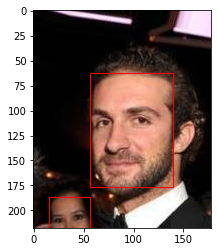

In [57]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    pyplot.show()

filename = '1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)